In [1]:
#NATIVE PYTHON IMPORTS

#INSTALLED PACKAGE IMPORTS
from geopy.point import Point
from shapely import Polygon
from shapely import Point as ShapelyPoint

#IMPORTS FROM THIS PACAKGE
from grid_src.grid import Grid

In [2]:
file = "/home/mlitton/Downloads/MAST2.14/CLOX_experiments/experiment_MLL.json"

In [3]:
grid = Grid(file, grid_height=30, grid_width=100)


In [4]:
grid.plot()

15.698973958723151, 119.6581281041376
False


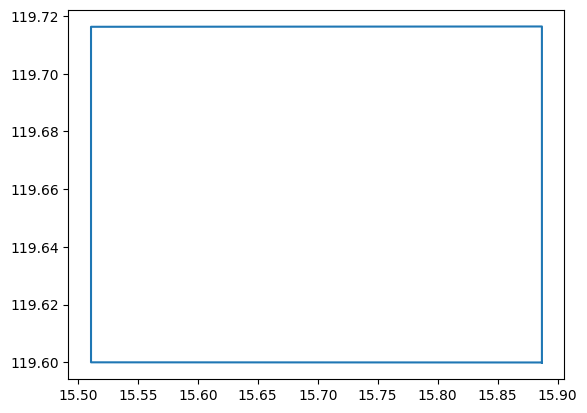

In [5]:
import matplotlib.pyplot as plt

coords_vec = grid.grid[0][0].poly_coords
p = Polygon(coords_vec)
x,y = p.exterior.xy
plt.plot(x,y)
print(grid.grid[0][0].center.format_decimal())
pt = ShapelyPoint(grid.grid[0][1].center.latitude,grid.grid[0][1].center.longitude)
print(p.contains(pt))

In [6]:
cell1 = grid.grid[-1][-1]
print(cell1.coordinate)
print(grid.convert_latlong_to_index(cell1.center.latitude,cell1.center.longitude))

(29, 99)
(29, 99)


(28, 98)


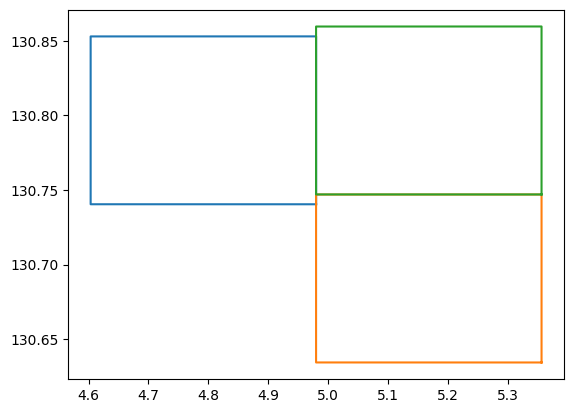

In [9]:
from shapely import MultiPolygon

fig, ax = plt.subplots()

p1 = Polygon(cell1.poly_coords)
cell2 = grid.grid[-2][-2]
print(cell2.coordinate)
p2 = Polygon(cell2.poly_coords)

p3 = Polygon(grid.grid[-2][-1].poly_coords)

polygons = MultiPolygon([p1,p2,p3])

for poly in polygons.geoms:
    x,y = poly.exterior.xy
    ax.plot(x,y)

plt.show()


In [8]:
import math
180+math.degrees(math.atan(8/4))

243.43494882292202